## The current working directory

In [342]:
pwd

'C:\\Users\\Owner\\Assignment 3'

## Imports

In [343]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

## Loading data 

In [344]:
data = pd.read_csv("house_data_complete.csv")
training_data = pd.read_csv("house_prices_data_training_data.csv")
data = data.drop('date',1)

## Dividing the data into training, cross-validation and testing

In [345]:
X = data.values[:,2:]
y = data.values[:,1]
X_train, X_testCV, y_train, y_testCV = train_test_split(X, y, test_size=0.4)
X_test, X_CV, y_test, y_CV = train_test_split(X_train, y_train, test_size=0.5)

## Visualization of the data

In [346]:
def plotData(x, y):
    fig = pyplot.figure()  # open a new figure
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Price')
    pyplot.xlabel('Area of living in square feet')

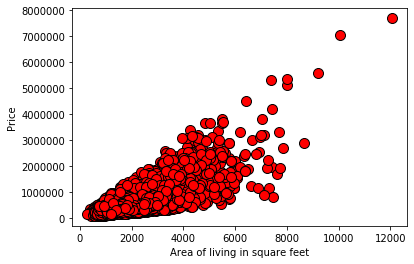

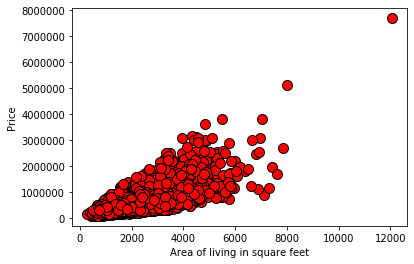

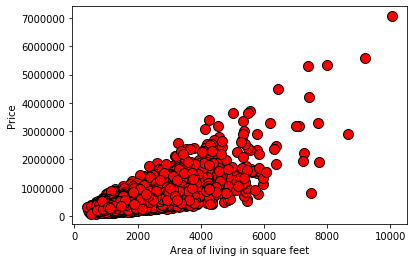

In [347]:
plotData(X_train[:,2],y_train)
plotData(X_CV[:,2],y_CV)
plotData(X_test[:,2],y_test)

## Normalization

In [348]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    for i in range(X.shape[1]):
        mu[i] = np.mean(X_norm[:,i])
        sigma[i] = np.std(X_norm[:,i])
        X_norm[:,i] = (X_norm[:,i]-mu[i])/sigma[i]
    
    return X_norm, mu, sigma

In [349]:
X_train_norm, mu, sigma = featureNormalize(X_train)
X_CV_norm, mu, sigma = featureNormalize(X_CV)
X_test_norm, mu, sigma = featureNormalize(X_test)

In [350]:
m_train = y_train.size
m_CV = y_CV.size
m_test = y_test.size
# Add intercept term to X_train, X_CV and X_test
X_train = np.concatenate([np.ones((m_train, 1)), X_train_norm], axis=1)
X_CV = np.concatenate([np.ones((m_CV, 1)), X_CV_norm], axis=1)
X_test = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

## Cost function

In [351]:
def computeCostMulti(X, y, theta, lambda_):
    m = y.shape[0]  # number of training examples
    hypothesis = np.dot(theta,X.transpose())
    J = ((np.sum(np.square(hypothesis-y)))/(2*m))+(lambda_/(2*m))*(np.sum(np.square(theta[1:])))
    return J

## Gradient Descent

In [352]:
def gradientDescentMulti(X, y, theta, alpha, num_iters, lambda_):
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        hypothesis = np.dot(theta,X.transpose())
        theta = theta*(1-(alpha*lambda_)/m) - (alpha/m)*(np.dot(hypothesis-y,X))
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta, lambda_))
    
    fig = pyplot.figure()
    pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
    
    pyplot.xlabel('Number of iterations')
    pyplot.ylabel('Cost J')
    
    return theta, J_history

## Training using the linear hypothesis

[array([541527.51237758, -31496.3024487 ,  23556.95303484,  86187.72184789,
         8952.69801743,   6676.94762273,  43549.02391017,  38735.85939091,
        17745.88021516, 113240.13993353,  78162.80832032,  33083.77719119,
       -77169.03728487,   8994.79921473, -31357.07249077,  82664.6361565 ,
       -30449.50873317,  16379.34160671, -10745.19022267]), array([537383.27489095, -30655.1380649 ,  23690.42278027,  85437.97593766,
         8836.93186817,   6832.0289001 ,  43341.3371201 ,  38744.5482543 ,
        17922.96510703, 111607.68028643,  77362.10402683,  33024.18294896,
       -75733.09685444,   9302.96804504, -30451.70768034,  82188.27318868,
       -30254.94201013,  17860.88970559, -10479.97324949]), array([540693.55917457, -31325.84479659,  23583.90943178,  86035.30649873,
         8929.47252619,   6708.83315511,  43507.4047709 ,  38737.60694729,
        17782.92026644, 112906.10213298,  77999.9971282 ,  33071.73137633,
       -76876.32526416,   9058.17787535, -31172.916634

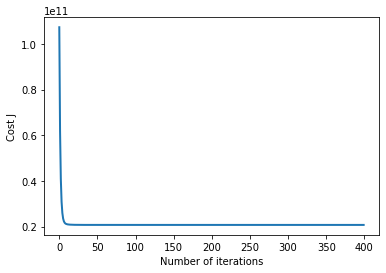

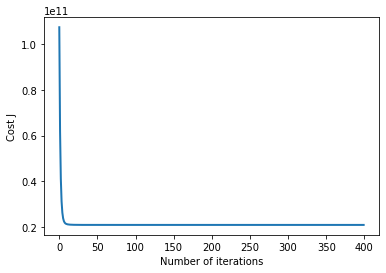

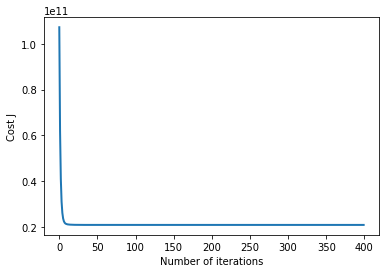

In [353]:
lambdas_ = [0, 100, 20]
thetas = []
for lambda_ in lambdas_:
    alpha = 0.3
    num_iters = 400
    theta = np.zeros(X_train.shape[1])
    theta, J_history = gradientDescentMulti(X_train, y_train, theta, alpha, num_iters, lambda_)
    thetas.append(theta)
print(thetas)

# Cross validation using linear hypothesis

In [354]:
All_J = []
for theta in thetas:
    hypothesis = np.dot(theta,X_CV.transpose())
    J = (1/2*m_CV)*np.sum(np.square(hypothesis-y_CV))
    All_J.append(J)
index_of_least_J = All_J.index(min(All_J))

## Testing using the linear hypothesis

In [355]:
theta = thetas[index_of_least_J]
hypothesis = np.dot(theta,X_test.transpose())
J = (1/2*m_test)*np.sum(np.square(hypothesis-y_test))

## Training using quadratic hypothesis

[array([101132.02792943,    166.49275239,  10836.24716617,    607.16226376,
          182.93143269,  50445.09107501,   2074.76171693,  17671.01683561,
        27146.58166973,  37355.54383818,  42707.78088814,  50144.80242744,
        62876.11730548,   7040.98401223,  35907.29299296,   1322.40189674,
        10874.55029627,  32947.35324208,    344.32807263]), array([100802.18698077,    170.38227852,  10892.56345508,    711.45420711,
          182.81848363,  50386.29431545,   2073.92586692,  17686.06017064,
        27173.57519218,  37331.16509959,  42630.89144161,  50071.64040859,
        62764.52941656,   7056.24881702,  35884.23024824,   1421.42376438,
        10931.89422299,  32947.61297536,    345.70822177]), array([101065.91021592,    167.27136401,  10847.53733088,    628.06571763,
          182.90871359,  50433.32026247,   2074.59361769,  17674.0313914 ,
        27152.00398816,  37350.662589  ,  42692.36587735,  50130.14333413,
        62853.76359802,   7044.04191705,  35902.681073

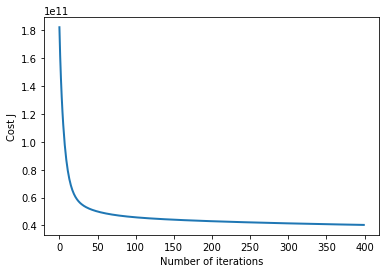

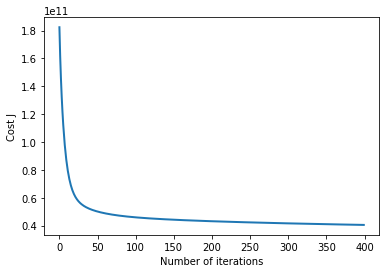

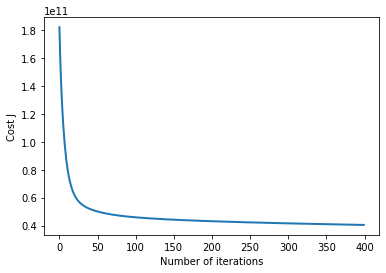

In [356]:
lambdas_ = [0, 100, 20]
thetas = []
for lambda_ in lambdas_:
    alpha = 0.003
    num_iters = 400
    theta = np.zeros(X_train.shape[1])
    theta, J_history = gradientDescentMulti(np.power(X_train,2), y_train, theta, alpha, num_iters, lambda_)
    thetas.append(theta)
print(thetas)

## Cross validation using quadratic hypothesis

In [357]:
All_J = []
for theta in thetas:
    hypothesis = np.dot(theta,np.power(X_CV,2).transpose())
    J = (1/2*m_CV)*np.sum(np.square(hypothesis-y_CV))
    All_J.append(J)
index_of_least_J = All_J.index(min(All_J))

## Testing using quadratic hypothesis

In [358]:
theta = thetas[index_of_least_J]
hypothesis = np.dot(theta,np.power(X_test,2).transpose())
J = (1/2*m_test)*np.sum(np.square(hypothesis-y_test))

## Training using cubic hypothesis

[array([ 996.8306319 ,   26.567748  , 1803.29601612, 4322.06615557,
         -5.01179584,  828.24662532,  469.46662772, 4194.04617917,
       1208.55780961, 2561.013563  , 3523.48146672, 2781.77810267,
       -453.29748717, 3750.79202616,  257.9454092 ,  -45.809358  ,
        692.58333683, 2728.58937811,  437.85908207]), array([ 996.82308182,   26.56776672, 1803.28449149, 4322.03954317,
         -5.01175839,  828.24041727,  469.46909441, 4194.01759232,
       1208.54867201, 2560.99555105, 3523.45843107, 2781.75936138,
       -453.29411004, 3750.76853268,  257.94346423,  -45.80902943,
        692.57820843, 2728.57011879,  437.85915434]), array([ 996.82912188,   26.56775175, 1803.29371118, 4322.06083307,
         -5.01178835,  828.24538371,  469.46712106, 4194.04046178,
       1208.55598208, 2561.00996059, 3523.47685958, 2781.77435439,
       -453.29681174, 3750.78732744,  257.9450202 ,  -45.80929229,
        692.58231114, 2728.58552623,  437.85909652])]


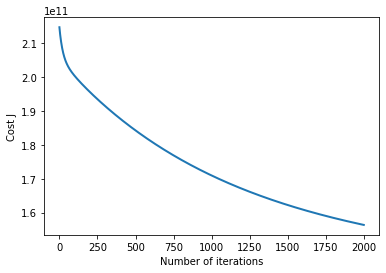

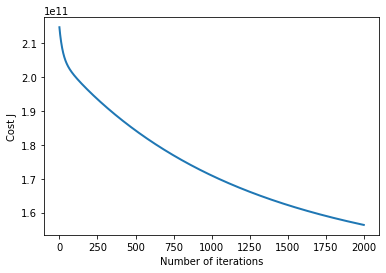

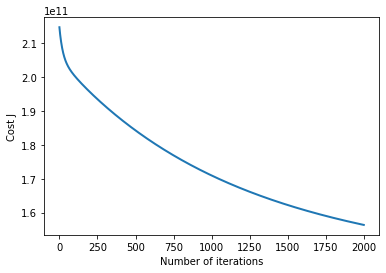

In [359]:
lambdas_ = [0, 100, 20]
thetas = []
for lambda_ in lambdas_:
    alpha = 0.000001
    num_iters = 2000
    theta = np.zeros(X_train.shape[1])
    theta, J_history = gradientDescentMulti(np.power(X_train,3), y_train, theta, alpha, num_iters, lambda_)
    thetas.append(theta)
print(thetas)

## Cross validation using cubic function

In [360]:
All_J = []
for theta in thetas:
    hypothesis = np.dot(theta,np.power(X_CV,3).transpose())
    J = (1/2*m_CV)*np.sum(np.square(hypothesis-y_CV))
    All_J.append(J)
index_of_least_J = All_J.index(min(All_J))

## Testing using the cubic hypothesis

In [361]:
theta = thetas[index_of_least_J]
hypothesis = np.dot(theta,np.power(X_test,2).transpose())
J = (1/2*m_test)*np.sum(np.square(hypothesis-y_test))

## 3 fold using the linear hypothesis

In [362]:
kfold = KFold(3, True, 1)